In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import missingno as msno
import platform
from matplotlib import font_manager, rc
import matplotlib as mpl
from datetime import datetime
import time
from tqdm import tqdm
from PIL import Image
import os
import cv2

%matplotlib inline

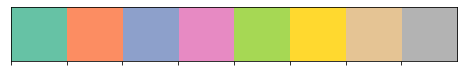

In [12]:
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')

mpl.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore')

tqdm.pandas()

custom_palette = sns.color_palette("Set2")
sns.palplot(custom_palette)
pd.options.display.float_format = '{:.4f}'.format

In [3]:
path = './data/'
etf_info = pd.read_csv(path+'etf_info.csv', encoding='euc_kr', parse_dates=['설정일'])
etf_data = pd.read_csv(path+'etf_data.csv', encoding='euc_kr', parse_dates=['tdate'])
stock_data = pd.read_csv(path+'stock_data.csv', encoding='euc_kr', parse_dates=['tdate'])
pdf_monthly = pd.read_csv(path+'pdf_data_monthly.csv', encoding='euc_kr', parse_dates=['tdate'])
macro_data = pd.read_csv(path+'macro_data.csv', encoding='euc_kr')
stock_sector = pd.read_csv(path+'stock_sector_data.csv', encoding='euc_kr')

# Data Load

In [5]:
etf_info.head()

,코드,펀드명,분류,벤치마크명,설정일
0,A377990,TIGER Fn신재생에너지,4.국내-전략,FnGuide 신재생에너지 지수,2021-03-04
1,A376410,TIGER 탄소효율그린뉴딜,03.국내-전략,KRX/S&P 탄소효율그린뉴딜지수,2021-02-04
2,A364960,TIGER KRX BBIG K-뉴딜,03.국내-전략,KRX BBIG K-뉴딜,2020-10-06
3,A364980,TIGER KRX2차전지K-뉴딜,03.국내-전략,KRX 2차전지 K-뉴딜 지수,2020-10-06
4,A364970,TIGER KRX바이오K-뉴딜,03.국내-전략,KRX 바이오 K-뉴딜 지수,2020-10-06


In [6]:
etf_data.head()

,tdate,etf_code,data_name,value
0,2012-01-02,A091220,거래량,5114
1,2012-01-02,A091220,고가,7240
2,2012-01-02,A091220,시가,7240
3,2012-01-02,A091220,저가,7055
4,2012-01-02,A091220,종가,7110


In [7]:
stock_data.head()

,tdate,stock_code,data_name,value
0,2006-01-02,A006260,거래량,99233
1,2006-01-02,A009830,거래량,1143367
2,2006-01-02,A010060,거래량,77502
3,2006-01-02,A011930,거래량,727141
4,2006-01-02,A018000,거래량,957108


In [8]:
pdf_monthly.head()

,tdate,etf_code,stock_code,stock_name,ratio
0,2021-03-31,A377990,A006260,LS,0.091023
1,2021-03-31,A377990,A009830,한화솔루션,0.116892
2,2021-03-31,A377990,A010060,OCI,0.160506
3,2021-03-31,A377990,A011930,신성이엔지,0.045884
4,2021-03-31,A377990,A018000,유니슨,0.044053


In [9]:
macro_data.head()

,Item Name,"국내총생산(명목, 원화표시)(십억원)","국내총생산(명목, 달러표시)(억달러)","국민총소득(명목, 원화표시)(십억원)","국민총소득(명목, 달러표시)(억달러)",국내총소득(%),국민총소득(%),건설투자(%),설비투자(%),GDP 디플레이터(2015=100),...,한국(2015=100),미국(2015=100),일본(2015=100),영국(2015=100),독일(2015=100),한국(%),미국(%),일본(%).1,중국(%).1,영국(%).1
0,Frequency,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,M,M,M,M,M,Q,Q,Q,Q,Q
1,2000-01-12,591453,4972.4,584929.4,4917.5,10.5,10.7,-3.3,35.5,71.39,...,46.7,90.4,103.1,109.9,77.1,2.9,1.7,0,NaN,1.5
2,2000-01-13,591453,4972.4,584929.4,4917.5,10.5,10.7,-3.3,35.5,71.39,...,46.7,90.4,103.1,109.9,77.1,2.9,1.7,0,NaN,1.5
3,2000-01-14,591453,4972.4,584929.4,4917.5,10.5,10.7,-3.3,35.5,71.39,...,46.7,90.4,103.1,109.9,77.1,2.9,1.7,0,NaN,1.5
4,2000-01-15,591453,4972.4,584929.4,4917.5,10.5,10.7,-3.3,35.5,71.39,...,46.7,90.4,103.1,109.9,77.1,2.9,1.7,0,NaN,1.5


In [10]:
stock_sector.head()

,Unnamed: 0,A006260,A009830,A010060,A011930,A018000,A034020,A081000,A086390,A100090,...,A077360,A096640,A033170,A123260,A114810,A141000,A241770,A255440,A123860,A006350
0,2006-01-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
1,2006-02-28,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
2,2006-03-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
3,2006-04-30,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행
4,2006-05-31,"코스피 전기,전자",코스피 화학,코스피 화학,코스피 기계,코스닥 제조,코스피 기계,코스피 화학,NaN,NaN,...,코스닥 IT H/W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,코스피 은행


# Data check

데이터별로 결측치와 통계치를 확인해보겠습니다.  

## etf_info

- 투자 대상 ETF 정보  
    - 파일 이름 : etf_info.csv
        - 현재 상장되어 운용중인 ETF의 기본정보

In [11]:
etf_info.columns

Index(['코드', '펀드명', '분류', '벤치마크명', '설정일'], dtype='object')

설정일 정보는 시간 데이터이므로 timestampe형식으로 변경해주겠습니다.

<Figure size 720x576 with 0 Axes>

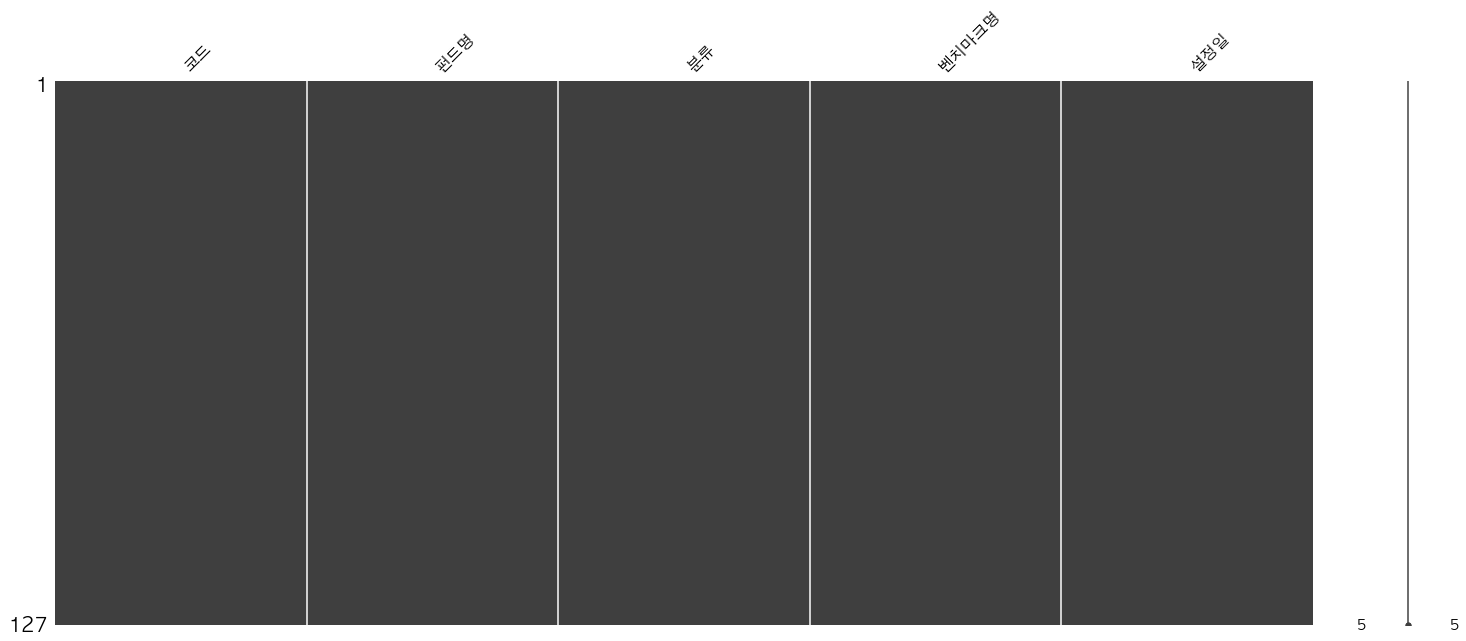

In [12]:
plt.figure(figsize=(10,8))

msno.matrix(etf_info)
plt.show()

In [13]:
etf_info.isna().sum()

코드       0
펀드명      0
분류       0
벤치마크명    0
설정일      0
dtype: int64

일단 ETF 정보에는 결측치는 존재하지 않는 것으로 보입니다.  
이번엔 각 데이터별 고유 정보의 수를 확인해보겠습니다.

In [14]:
funds = etf_info['펀드명'].unique()
codes = etf_info['코드'].unique()
fund_categories = etf_info['분류'].unique()
benchmarks = etf_info['벤치마크명'].unique()

print(f'전체 데이터의 수 : {etf_info.shape[0]}')
print(f'펀드의 종류 : {len(funds)}')
print(f'펀드 코드의 종류 : {len(codes)}')
print(f'펀드 카테고리의 수 : {len(fund_categories)}')
print(f'벤치마크 종류 수 : {len(benchmarks)}')

전체 데이터의 수 : 127
펀드의 종류 : 126
펀드 코드의 종류 : 126
펀드 카테고리의 수 : 17
벤치마크 종류 수 : 120


카테고리별로 데이터를 분류해보겠습니다.

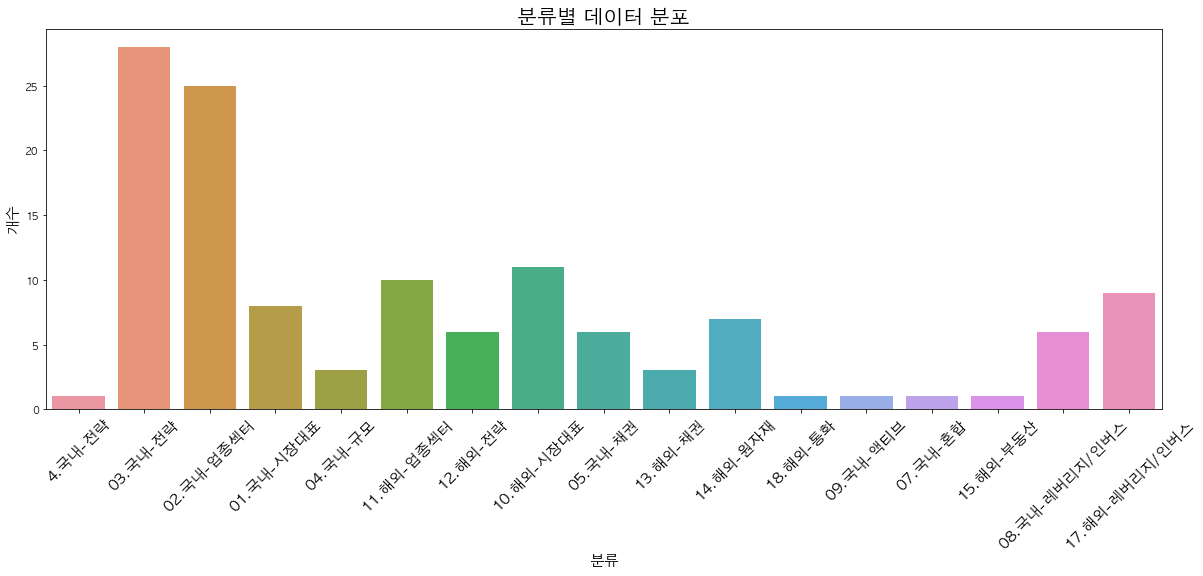

In [15]:
fig, ax = plt.subplots(figsize=(20,7))
sns.countplot(data=etf_info, x='분류', ax=ax)
plt.xlabel('분류', fontsize=15)
plt.ylabel('개수', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.title('분류별 데이터 분포', fontsize=20)
plt.show()

In [16]:
fund_categories

array(['4.국내-전략', '03.국내-전략', '02.국내-업종섹터', '01.국내-시장대표', '04.국내-규모',
       '11.해외-업종섹터', '12.해외-전략', '10.해외-시장대표', '05.국내-채권', '13.해외-채권',
       '14.해외-원자재', '18.해외-통화', '09.국내-액티브', '07.국내-혼합', '15.해외-부동산',
       '08.국내-레버리지/인버스', '17.해외-레버리지/인버스'], dtype=object)

## etf_data

- ETF 가격데이터
    - 파일 이름 : etf_data.csv
        - ETF의 일별 시가, 고가, 저가, 종가, 거래량 데이터

우선 날짜 정보를 timestamp 타입으로 변환하겠습니다.

In [17]:
def get_etf_data(data):
    ret = pd.DataFrame()
    
    code = data['etf_code'].values[0]
    dates = data['tdate'].unique()
    
    ret['tdate'] = dates
    ret['etf_code'] = code
    ret['시가'] = data.loc[data.data_name == '시가'].value.values
    ret['저가'] = data.loc[data.data_name == '저가'].value.values
    ret['고가'] = data.loc[data.data_name == '고가'].value.values
    ret['종가'] = data.loc[data.data_name == '종가'].value.values
    ret['거래량'] = data.loc[data.data_name == '거래량'].value.values
    
    return ret

In [4]:
if 'etf_data_new.csv' in os.listdir(path):
    etf_data_new = pd.read_csv(path+'etf_data_new.csv', parse_dates=['tdate'], encoding='euc_kr')
else:
    etf_data.tdate = etf_data.tdate.progress_apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    etf_data_new = pd.DataFrame(columns=['tdate', 'etf_code', '시가', '저가', '고가', '종가', '거래량'])
    grouped = etf_data.groupby('etf_code', as_index=False)

    for name, item in tqdm(grouped):
        tmp = get_etf_data(item)

        etf_data_new = etf_data_new.append(tmp, ignore_index=True)

    etf_data_new[['시가', '종가', '저가', '고가', '거래량']] = etf_data_new[['시가', '종가', '저가', '고가', '거래량']].apply(pd.to_numeric)
    etf_data_new.to_csv(path+'etf_data_new.csv', index=False, encoding='euc_kr')

이제 etf_data의 결측치를 확인하겠습니다. 데이터프레임을 재정의해야하므로 결측치가 존재하는지 확인해야합니다.

<AxesSubplot:>

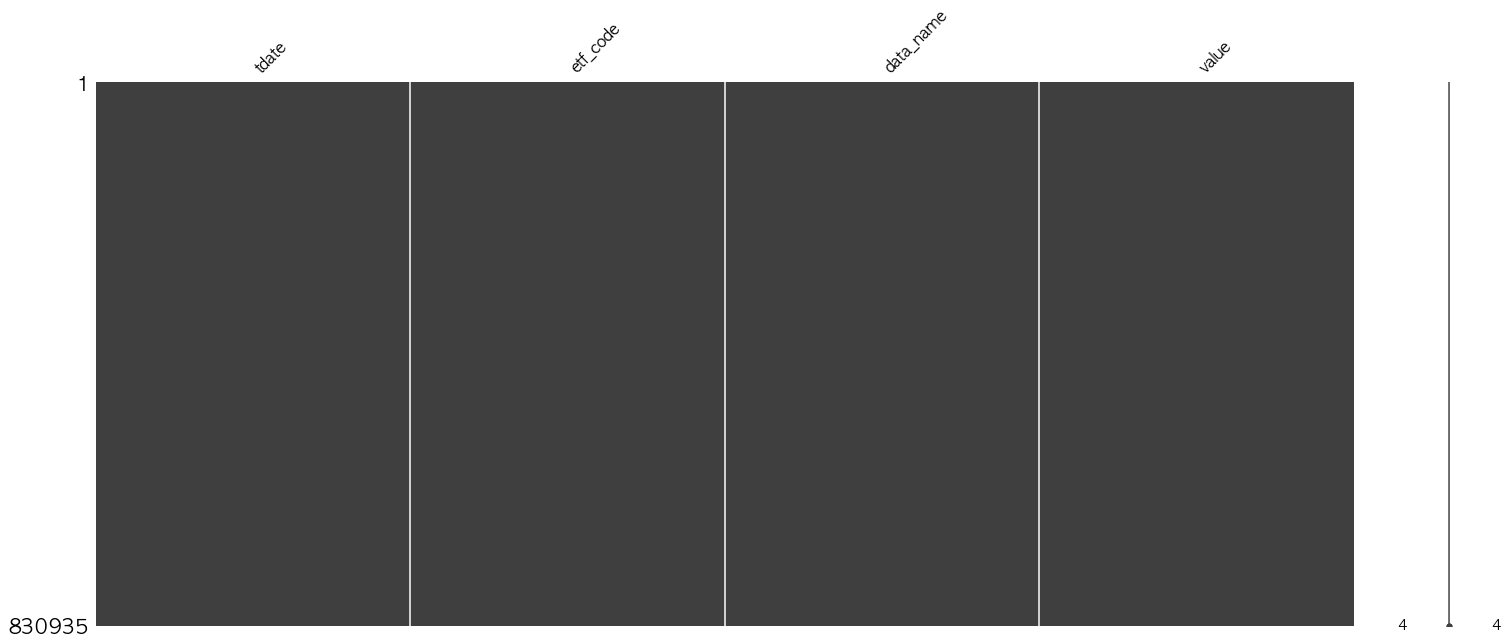

In [5]:
msno.matrix(etf_data)

In [6]:
etf_data.isna().sum()

tdate        0
etf_code     0
data_name    0
value        0
dtype: int64

결측치는 따로 존재하지 않는 것 같습니다.

etf_data는 데이터의 형태가 특이하기때문에 데이터프레임을 재정의할 필요가 있습니다.  
![](https://raw.githubusercontent.com/ElectionInfo/magi/main/img/etf_data.png?token=AOWMF3CXDDTF7IVNHKOPPQLBBQIIW)

데이터프레임을 분석해보면 우선적으로 `tdate`를 기준으로 각 `etf_code`의 `data_name`을 컬럼으로 재정의 할 필요가 있습니다.

In [7]:
etf_data_new.head()

,tdate,etf_code,시가,저가,고가,종가,거래량
0,2012-01-02,A091220,7240,7055,7240,7110,5114
1,2012-01-03,A091220,7180,7180,7365,7365,1979
2,2012-01-04,A091220,7370,7220,7370,7220,79
3,2012-01-05,A091220,7220,7150,7220,7150,359
4,2012-01-06,A091220,7145,7055,7165,7055,89


이제 데이터프레임을 전처리와 분석에 편리한 형태로 재정의 하였습니다.  
후에 데이터 관리의 편의를 위해 따로 저장을 해두겠습니다.  

우선 etf_code별로 가격들과 거래지표를 표시했습니다. 이제 주요 통계지표를 확인해보겠습니다.

In [13]:
etf_data_new.describe()

,시가,저가,고가,종가,거래량
count,166187.0000,166187.0000,166187.0000,166187.0000,166187.0000
mean,15478.1948,15391.2305,15549.3027,15473.0843,150474.5494
std,17497.7608,17482.9998,17514.1599,17499.6900,757755.9659
min,1215.0000,1185.0000,1260.0000,1185.0000,0.0000
25%,7855.0000,7800.0000,7905.0000,7850.0000,423.0000
50%,10930.0000,10855.0000,10990.0000,10925.0000,4132.0000
75%,15215.0000,15095.0000,15305.0000,15200.0000,38954.5000
max,120000.0000,112125.0000,131255.0000,131255.0000,96482489.0000


## stock_data

- ETF 보유내역에 존재하는 종목의 가격데이터
    - 파일 이름 : stock_data.csv
        - 종목들의 일별 시가, 고가, 저가, 종가, 거래량, 시가총액, 거래정지 구분 데이터  

etf_data와 마찬가지로 `tdate`변수를 timestamp로 변경해주고 데이터프레임을 재정의해야합니다.  
똑같은 과정을 거치겠습니다.

In [9]:
if 'stock_data_new.csv' in os.listdir(path):
    stock_data_new = pd.read_csv(path+'stock_data_new.csv', parse_dates=['tdate'], encoding='euc_kr')
else:
    stock_data.tdate = stock_data.tdate.progress_apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    piv = stock_data.pivot_table(index=['tdate', 'stock_code'], columns=['data_name'])
    piv = piv.reset_index()
    piv = piv.drop(['index'], axis=1)
    piv.columns = ['tdate', 'stock_code', '거래량', '거래정지여부(1:정지, 0:정상)', '고가', '시가', '시가총액', '저가', '종가']
    stock_data_new = piv
    
    stock_data_new.to_csv(path+'stock_data_new.csv', index=False, encoding='euc_kr')

In [14]:
stock_data_new.head()

,tdate,stock_code,거래량,"거래정지여부(1:정지, 0:정상)",고가,시가,시가총액,저가,종가
0,2006-01-02,A000020,29020.0000,0.0000,18900.0000,18700.0000,104184383100.0000,18650.0000,18650.0000
1,2006-01-02,A000040,4724552.0000,0.0000,990.0000,955.0000,100888019820.0000,955.0000,980.0000
2,2006-01-02,A000050,3350.0000,0.0000,175000.0000,158000.0000,364000000000.0000,158000.0000,175000.0000
3,2006-01-02,A000060,32350.0000,0.0000,53700.0000,53700.0000,450450000000.0000,51700.0000,52500.0000
4,2006-01-02,A000070,26941.0000,0.0000,47000.0000,45200.0000,462160024800.0000,44600.0000,46950.0000


In [15]:
stock_data_new.describe()

,거래량,"거래정지여부(1:정지, 0:정상)",고가,시가,시가총액,저가,종가
count,3973736.0000,3973836.0000,3974150.0000,3974150.0000,3975430.0000,3974150.0000,3974150.0000
mean,577751.6053,0.0073,39343.5259,38682.3531,1207210882468.8306,38007.4642,38677.9644
std,4265899.6224,0.0851,114475.8875,112791.6674,7628798807506.2881,111174.4702,112844.8507
min,0.0000,0.0000,55.0000,50.0000,648418365.0000,27.0000,27.0000
25%,20750.0000,0.0000,4365.0000,4270.0000,79482994360.0000,4180.0000,4265.0000
50%,90001.0000,0.0000,11350.0000,11100.0000,178867756405.0000,10800.0000,11100.0000
75%,318074.2500,0.0000,32100.0000,31500.0000,487576994522.5000,30900.0000,31500.0000
max,1367061445.0000,1.0000,4030000.0000,4000000.0000,543250212050000.0000,3887000.0000,3910000.0000


In [24]:
stock_data.isna().sum()

tdate         0
stock_code    0
data_name     0
value         0
dtype: int64

## stock_sector

- ETF 보유내역에 존재하는 종목의 가격데이터
    - 파일 이름 : stock_sector_data.csv
        - 종목들의 월별 업종 역사적 데이터  

In [25]:
stock_sector = stock_sector.rename(columns = {'Unnamed: 0' : 'tdate'})
stock_sector.tdate = stock_sector.tdate.progress_apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

100%|██████████| 185/185 [00:00<00:00, 68167.11it/s]


In [26]:
df = pd.DataFrame(columns=['tdate', 'stock_code', 'sector'])
codes = stock_sector.columns[1:]
dates = stock_sector.tdate

for code in codes:
    data = stock_sector[code]
    tmp = pd.DataFrame(columns=['tdate', 'stock_code', 'sector'])
    tmp['tdate'] = dates
    tmp['stock_code'] = code
    tmp['sector'] = data.values
    
    df = df.append(tmp, ignore_index=True)

In [27]:
stock_sector_new = df.dropna(inplace=False).reset_index(drop=True)
stock_sector_new

,tdate,stock_code,sector
0,2006-01-31,A006260,"코스피 전기,전자"
1,2006-02-28,A006260,"코스피 전기,전자"
2,2006-03-31,A006260,"코스피 전기,전자"
3,2006-04-30,A006260,"코스피 전기,전자"
4,2006-05-31,A006260,"코스피 전기,전자"
...,...,...,...
190420,2013-03-31,A006350,코스피 은행
190421,2013-04-30,A006350,코스피 은행
190422,2013-05-31,A006350,코스피 은행
190423,2013-06-30,A006350,코스피 은행


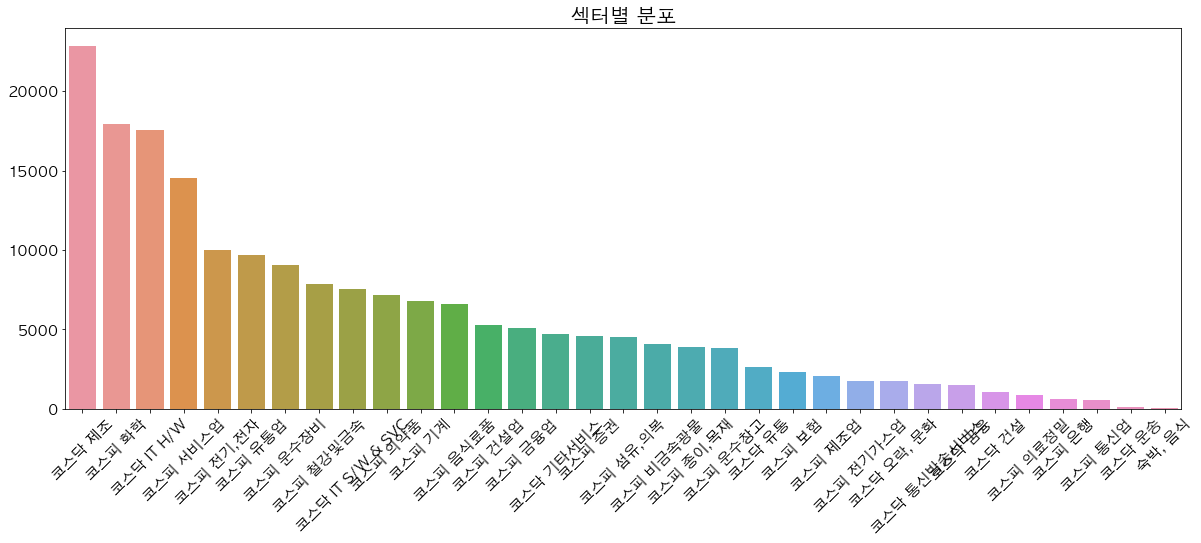

In [28]:
scount = stock_sector_new['sector'].value_counts()

fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x=scount.index, y=scount.values, ax=ax)
plt.title('섹터별 분포', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

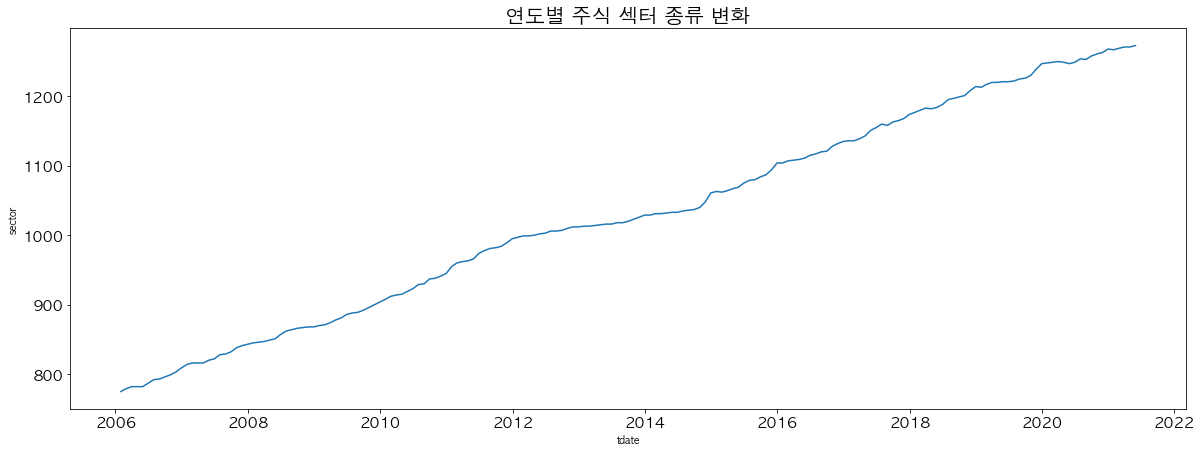

In [29]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.lineplot(data=stock_sector_new.groupby(['tdate']).count()['sector'], ax=ax)
plt.title('연도별 주식 섹터 종류 변화', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [30]:
s = stock_sector_new.groupby(['sector','tdate']).count().reset_index()
sectors = scount.index

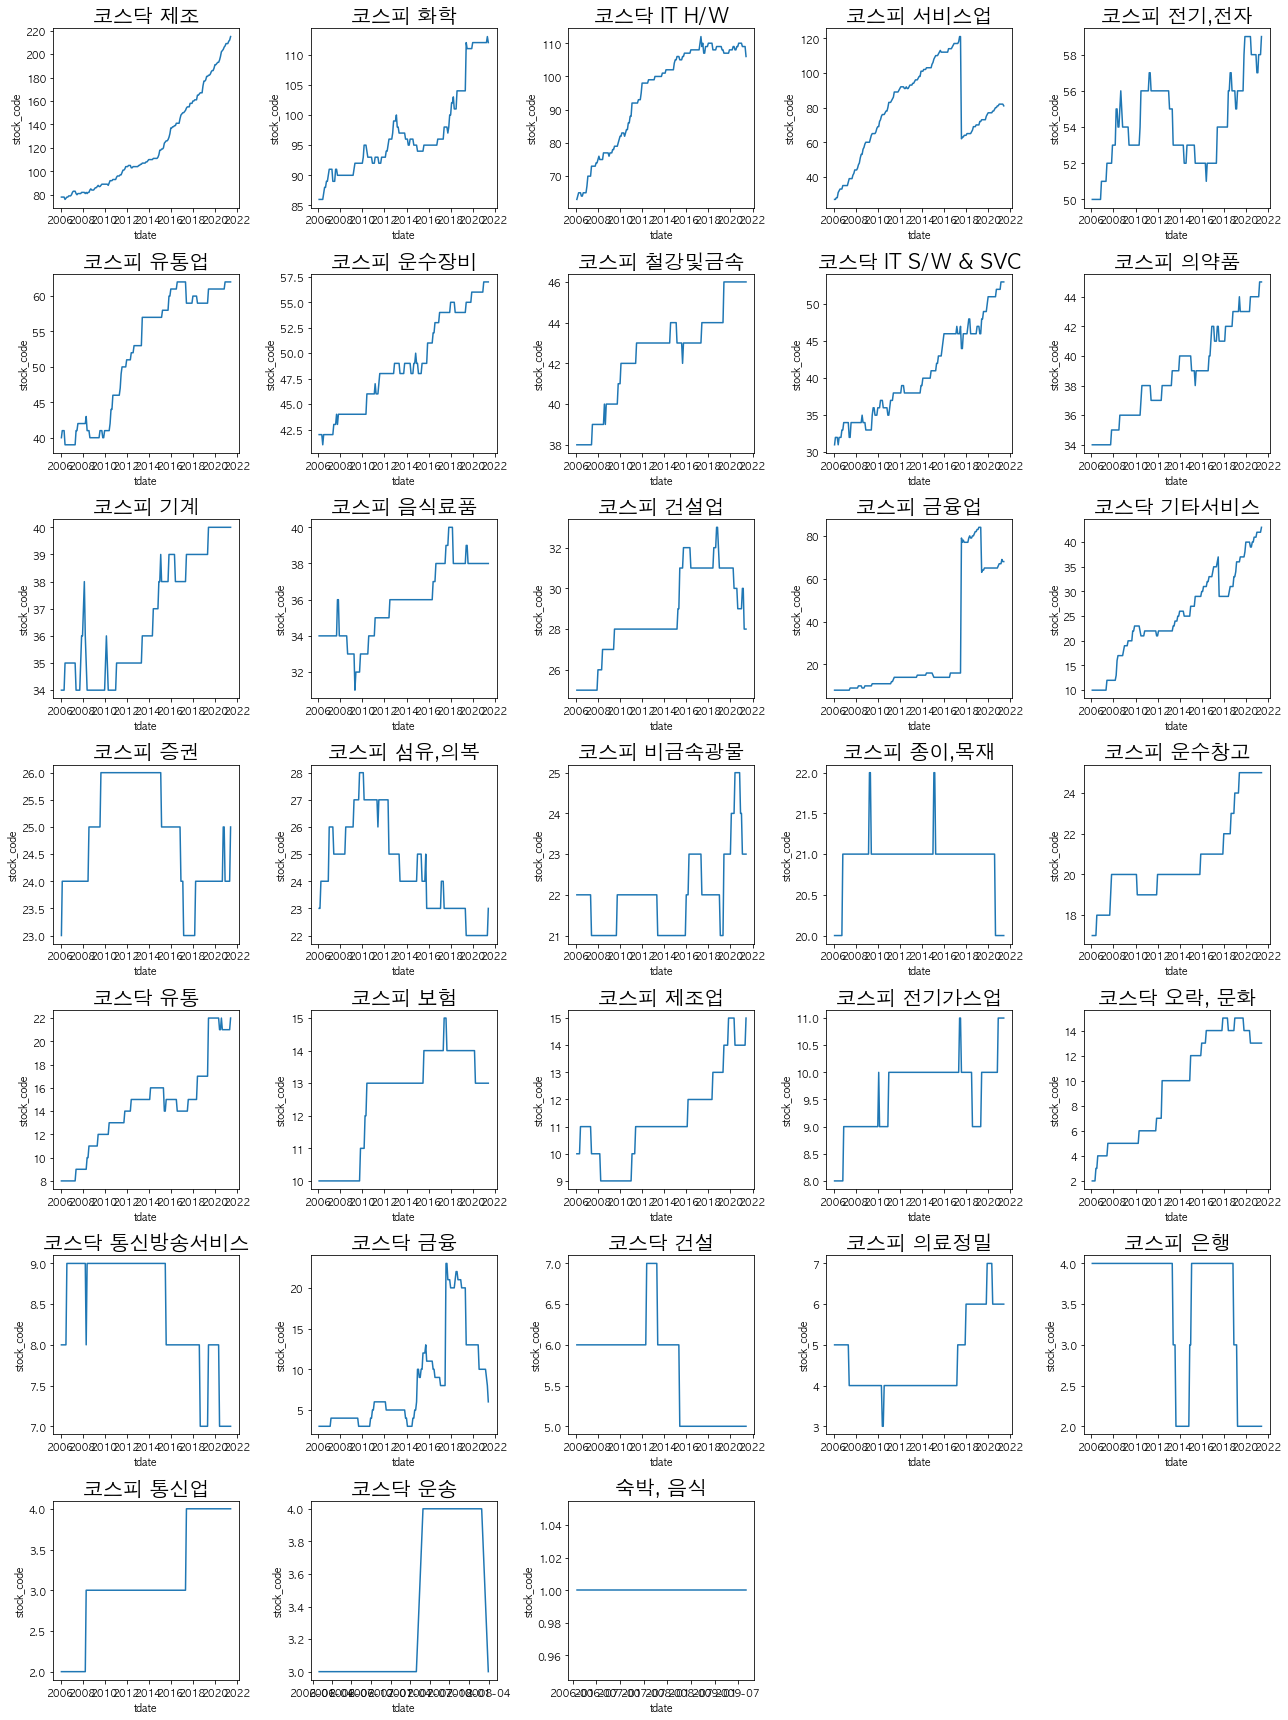

In [31]:
fig, axes = plt.subplots(7, 5, figsize=(18, 24))

class_order = sorted(sectors)

for sector, ax in zip(sectors, axes.flatten()):
    tmp = s.loc[s.sector == sector]
    
    sns.lineplot(data=tmp, x='tdate', y='stock_code', ax=ax)
    
    ax.set_title(sector, fontsize=20)
    
axes.flatten()[-1].axis('off')    
axes.flatten()[-2].axis('off')

fig.tight_layout()
plt.show()

## pdf_monthly

- 국내 주식형 ETF의 종목 보유내역
    - 파일 이름 : pdf_data_monthly.csv
        - ETF의 종목 보유내역의 월별 역사적 데이터

```.py
pivot = pdf_monthly.pivot(index=['tdate', 'etf_code'], columns='stock_name', values='ratio')
pivot = pivot.reset_index().set_index('tdate')

fig, axes = plt.subplots(12, 5, figsize=(30, 45))

codes = pivot.etf_code.unique()

class_order = sorted(codes)

for code, ax in tqdm(zip(codes, axes.flatten())):
    tmp = pivot.loc[pivot.etf_code == code]
    tmp = tmp.dropna(how='all', axis=1)
    tmp.plot.bar(stacked=True, ax=ax)

    ax.get_legend().set_visible(False)
    ax.set_xticks([])
    ax.set_ylabel('')
    ax.set_title(code, fontsize=25)

axes.flatten()[-1].axis('off')    

fig.tight_layout()
plt.show()
```

이 코드는 `pdf_monthly` 데이터를 etf_code별 시간에따라 구성 주식의 변화를 보여주는 그래프를 그리는 코드입니다.  
실행 시간이 너무 오래걸려 따로 colab에서 결과물을 도출했고 아래 사진을 참조하시길 바랍니다.

![](https://raw.githubusercontent.com/ElectionInfo/magi/main/img/stock_ratio.png?token=AOWMF3CPMP4OMXPPNECMFWDBBQIKO)

## macro_data

- 매크로 데이터 
    - 파일 이름 : macro_data.csv
        - 시장을 이해하는데 자주 사용되는 매크로 일별 데이터  
        - <font color=RED>주의사항 : 매크로데이터는 실제 데이터 날짜와 발표 날짜가 다르기 때문에 사용에 주의를 요합니다.</font>
            - 예시: 2017년 국내 총생산 지표
            - 주어진 데이터: 2017-12-31에 2017년의 국내총생산 값으로 변경
            - 실제 : 실제 확정 발표일은 2018년 3~4월.  
            - 따라서 매크로 데이터를 그대로 사용한다면 미래참조 이슈 존재
            - 충분히 Lagging을 해서 사용한다던가 하는 처리과정 필요 

In [35]:
len(macro_data['Item Name'][1:].unique())

7812

<AxesSubplot:>

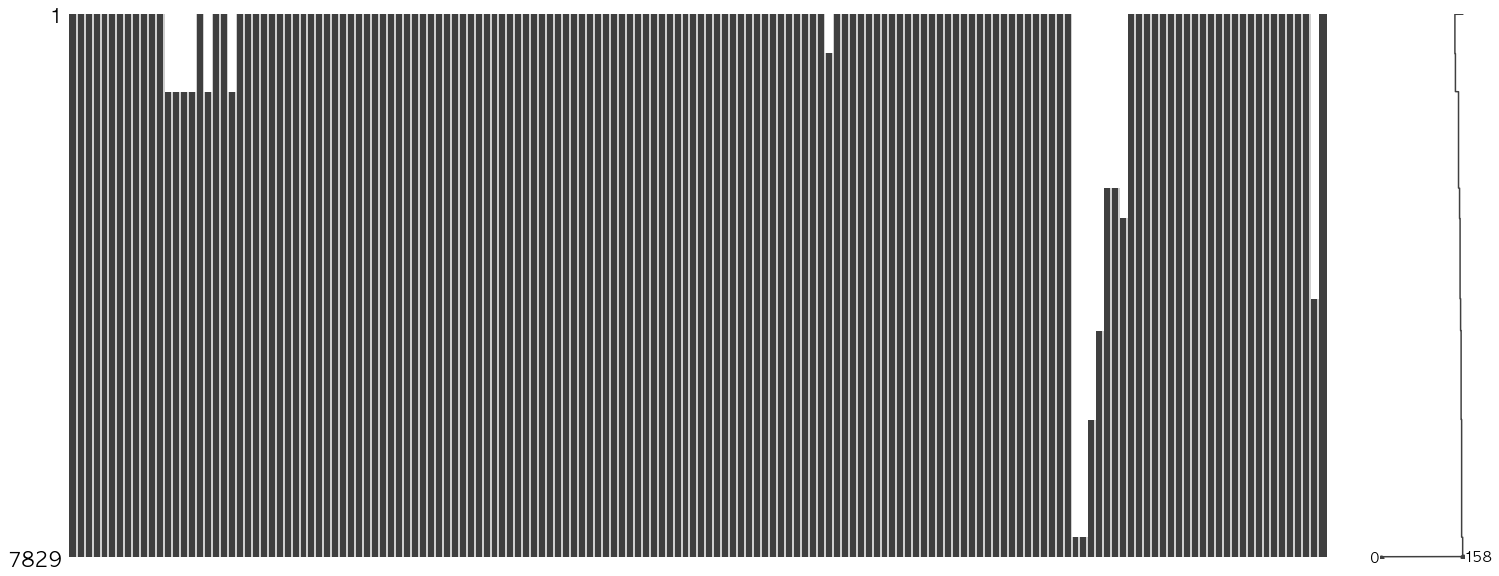

In [36]:
msno.matrix(macro_data)

In [37]:
cols = macro_data.columns

for item in cols:
    print(item)

Item Name
국내총생산(명목, 원화표시)(십억원)
국내총생산(명목, 달러표시)(억달러)
국민총소득(명목, 원화표시)(십억원)
국민총소득(명목, 달러표시)(억달러)
국내총소득(%)
국민총소득(%)
건설투자(%)
설비투자(%)
GDP 디플레이터(2015=100)
선행종합지수(2015=100)(2015=100)
선행종합지수 전월비(2015=100)
재고순환지표(2015=100)
경제심리지수(2015=100)
수출입물가비율(2015=100)(2015=100)
장단기금리차(2015=100)
동행종합지수(2015=100)(2015=100)
광공업생산지수(2015=100)(2015=100)
동행종합지수 전월비(2015=100)
동행지수 순환변동치(2015=100)
취업자수(천명)(2015=100)
구직기간 4주기준(실업률)원자료(%)
총지수(2015=100)
식료품 · 비주류음료(2015=100)
주류 및 담배(2015=100)
의류 및 신발(2015=100)
주택 ·수도 · 전기 및 연료(2015=100)
가정용품 및 가사 서비스(2015=100)
보건(2015=100)
교통(2015=100)
통신(2015=100)
오락 및 문화(2015=100)
교육(2015=100)
음식 및 숙박(2015=100)
기타 상품 및 서비스(2015=100)
소비자물가지수 생활물가지수(2015=100)
소비자물가지수 농산물및석유류제외(2015=100)
생산자물가지수 총지수(2015=100)
생산자물가지수 식료품(2015=100)
생산자물가지수 식료품이외(2015=100)
생산자물가지수 에너지(2015=100)
생산자물가지수 에너지이외(2015=100)
가공단계별물가지수 원재료(2015=100)
가공단계별물가지수 중간재(2015=100)
가공단계별물가지수 최종재(2015=100)
가공단계별물가지수 생산재(원재료+중간재)(2015=100)
수출물가지수 총지수(2015=100)
수입물가지수 총지수(2015=100)
수입물가지수 원재료(2015=100)
수입물가지수 자본재(2015=100)